In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
os.chdir('NewResults')

In [3]:
for exl in os.listdir('.'):
    if exl.endswith('.xlsx'):
        df = pd.read_excel(exl)
        
        cur_max = np.zeros(len(df['NAV']), dtype=np.float64)
        drawdown = np.zeros(len(df['NAV']), dtype=np.float64)
        for i, val in enumerate(df['NAV']):
            if i == 0:
                cur_max[i] = val
            else:
                cur_max[i] = max(val, cur_max[i-1])
            drawdown[i] = (val - cur_max[i]) / cur_max[i]
        print(exl + ":", np.max(drawdown*-100))
        
            

Lookback_21_Holding_21.xlsx: 69.01568054661212
Lookback_21_Holding_7.xlsx: 77.32527742784684
Lookback_126_Holding_7.xlsx: 48.68433185276842
Lookback_63_Holding_7.xlsx: 57.336592520111765
Lookback_252_Holding_7.xlsx: 47.07628371216982
Lookback_126_Holding_21.xlsx: 43.55915995705011
Lookback_252_Holding_21.xlsx: 41.267721929942724
Lookback_63_Holding_21.xlsx: 50.14761292688716
Lookback_7_Holding_7.xlsx: 59.824874527370696



 Lookback_21_Holding_21.xlsx


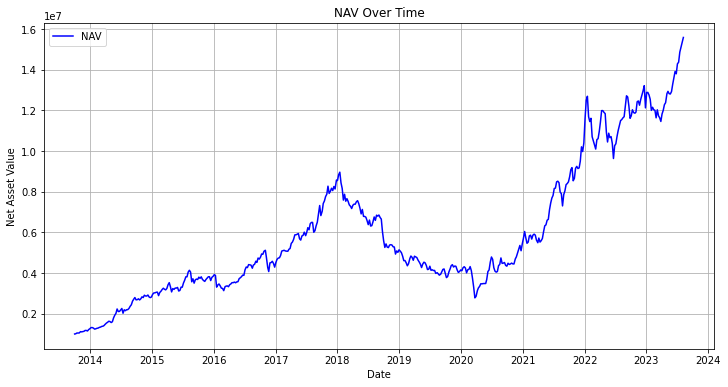

Sharpe Ratio: 2.4518905784114646

 Lookback_21_Holding_7.xlsx


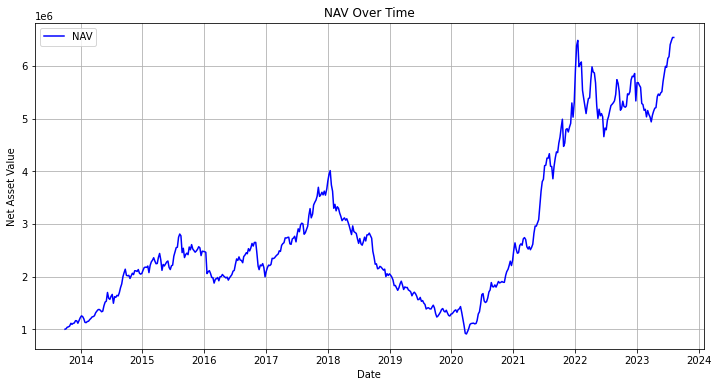

Sharpe Ratio: 1.7131119006204023

 Lookback_126_Holding_7.xlsx


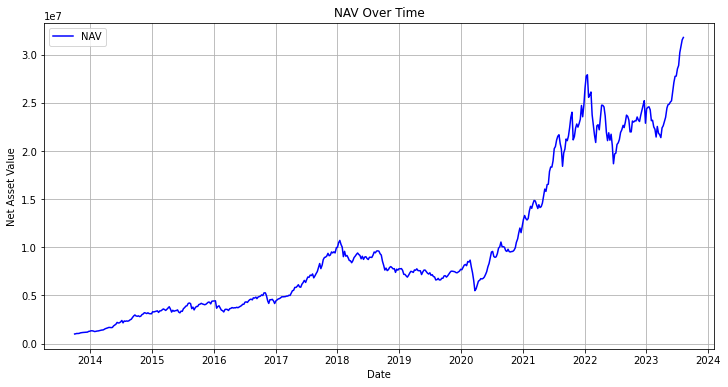

Sharpe Ratio: 3.039367752525343

 Lookback_63_Holding_7.xlsx


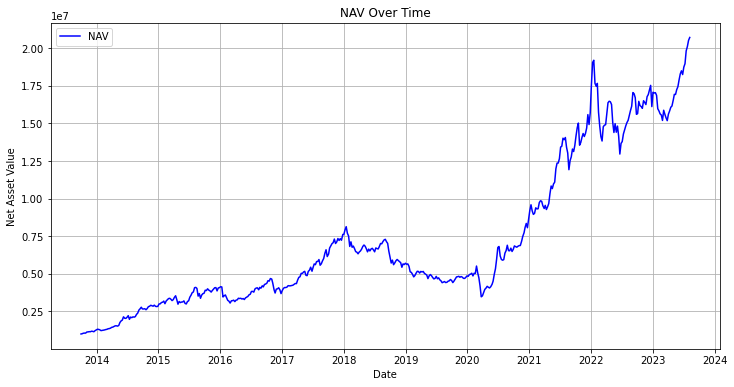

Sharpe Ratio: 2.6199797355735734

 Lookback_252_Holding_7.xlsx


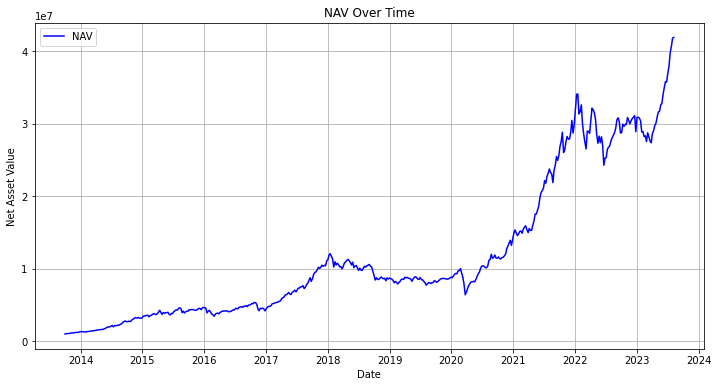

Sharpe Ratio: 3.350848576228275

 Lookback_126_Holding_21.xlsx


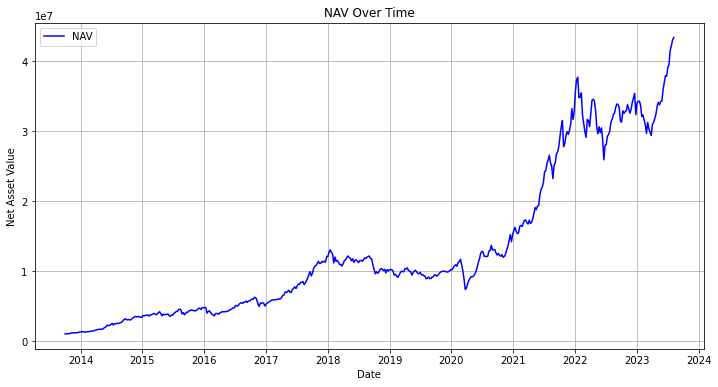

Sharpe Ratio: 3.2554295669906352

 Lookback_252_Holding_21.xlsx


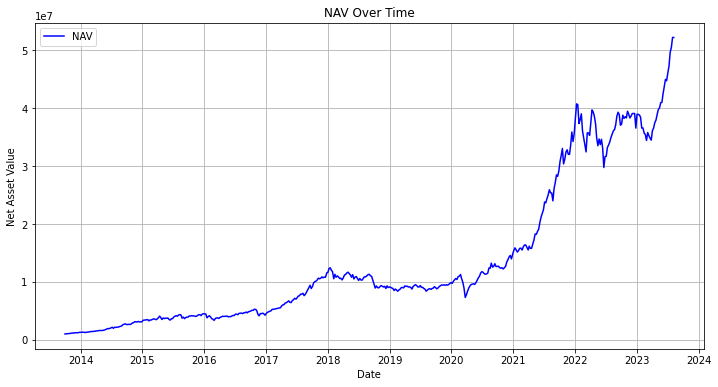

Sharpe Ratio: 3.5156426261848175

 Lookback_63_Holding_21.xlsx


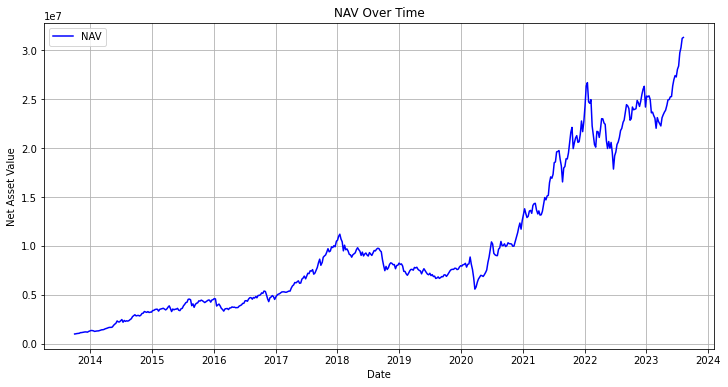

Sharpe Ratio: 2.924456469137354

 Lookback_7_Holding_7.xlsx


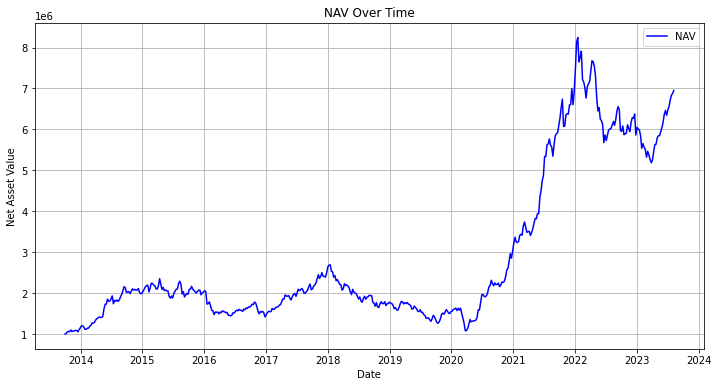

Sharpe Ratio: 1.7957251004690689


In [4]:
for exl in os.listdir('.'):
    if exl.endswith('.xlsx'):
        print("\n", exl)
        # Read the Excel file
        # Assuming the file has a 'Date' column and a 'NAV' column
        nav_data = pd.read_excel(exl, index_col='Date', parse_dates=True, date_format='%d-%m-%Y')

        # Convert index and NAV values to numpy arrays
        dates = nav_data.index.to_numpy()
        nav_values = nav_data['NAV'].to_numpy()

        # Plot NAV over time
        plt.figure(figsize=(12, 6))
        plt.plot(dates, nav_values, label='NAV', color='blue')
        plt.title('NAV Over Time')
        plt.xlabel('Date')
        plt.ylabel('Net Asset Value')
        plt.grid(True)
        plt.legend()
        plt.show()

        # Calculate Sharpe Ratio
        # Assuming a risk-free rate of 0%
        risk_free_rate = 0.07
        daily_returns = nav_data['NAV'].pct_change().dropna()
        sharpe_ratio = (daily_returns.mean() - risk_free_rate/252) / daily_returns.std() * np.sqrt(252) # Annualized

        # Calculate Sortino Ratio
        # Assuming a risk-free rate of 0% and focusing only on the downside
        # negative_returns = daily_returns[daily_returns < 0]
        # sortino_ratio = (daily_returns.mean() - risk_free_rate/252) / negative_returns.std() * np.sqrt(252)
        print(f"Sharpe Ratio: {sharpe_ratio}")

